# Potential Customer Classification of App Data



# Problem Statement

Its a financial app which has two version free and premium version in which we have to predict the customer who will take a premium version app subscription or not.

# Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil import parser # convert time in date time data type

# DataSet

* https://www.kaggle.com/abhishek2602/appdata10

# Importing Data Set using pandas

In [ ]:
# /content/drive/MyDrive/MAJU/ML/Project/P2 App Behavior to Subscription/appdata10.csv
# /content/drive/MyDrive/MAJU/ML/Project/P2 App Behavior to Subscription/top_screens.csv

filepath = '/content/drive/MyDrive/MAJU/ML/Project/P2 App Behavior to Subscription/appdata10.csv'


In [ ]:
df = pd.read_csv(filepath)

In [ ]:
rows, columns = df.shape
print("Rows: ", rows)
print("Columns: ", columns)

# Exploring Data Set

In [ ]:
df.head(6) # show fisrt 6 rows

In [ ]:
df.tail(6) # show last 6 rows

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

# Statistics

In [ ]:
df.describe() 

# Data Types of Each Column

In [ ]:
df.dtypes

# Converting Data Type of Hour Column

In [ ]:
# Series.str.slice(start=None, stop=None, step=None)
# date = '19:00:00'

df['hour'] = df.hour.str.slice(1,3).astype(int)

In [ ]:
df.head(5)

In [ ]:
df.dtypes    # Check data types again

# Data Visualization

### Dropping columns to visualize data

In [ ]:

df2 = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [ ]:
df2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Heat Map

Text(0.5, 1.0, 'Correlation Matrix Heat Map')

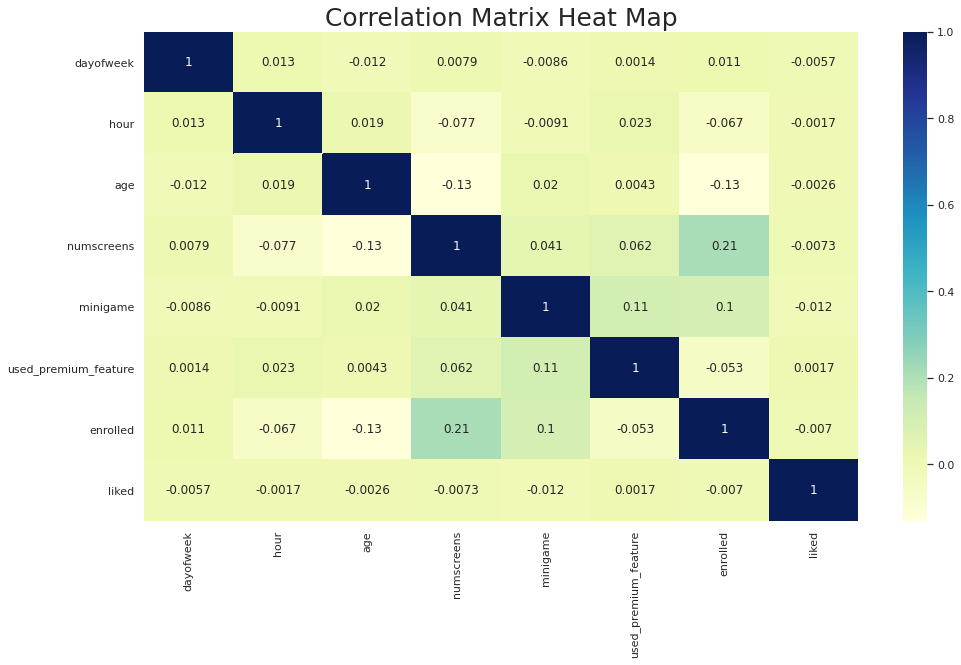

In [ ]:
plt.figure(figsize=(16,9))

sns.heatmap(df2.corr(), annot = True, cmap ='YlGnBu')

plt.title("Correlation Matrix Heat Map", fontsize = 25)

# Pair Plot

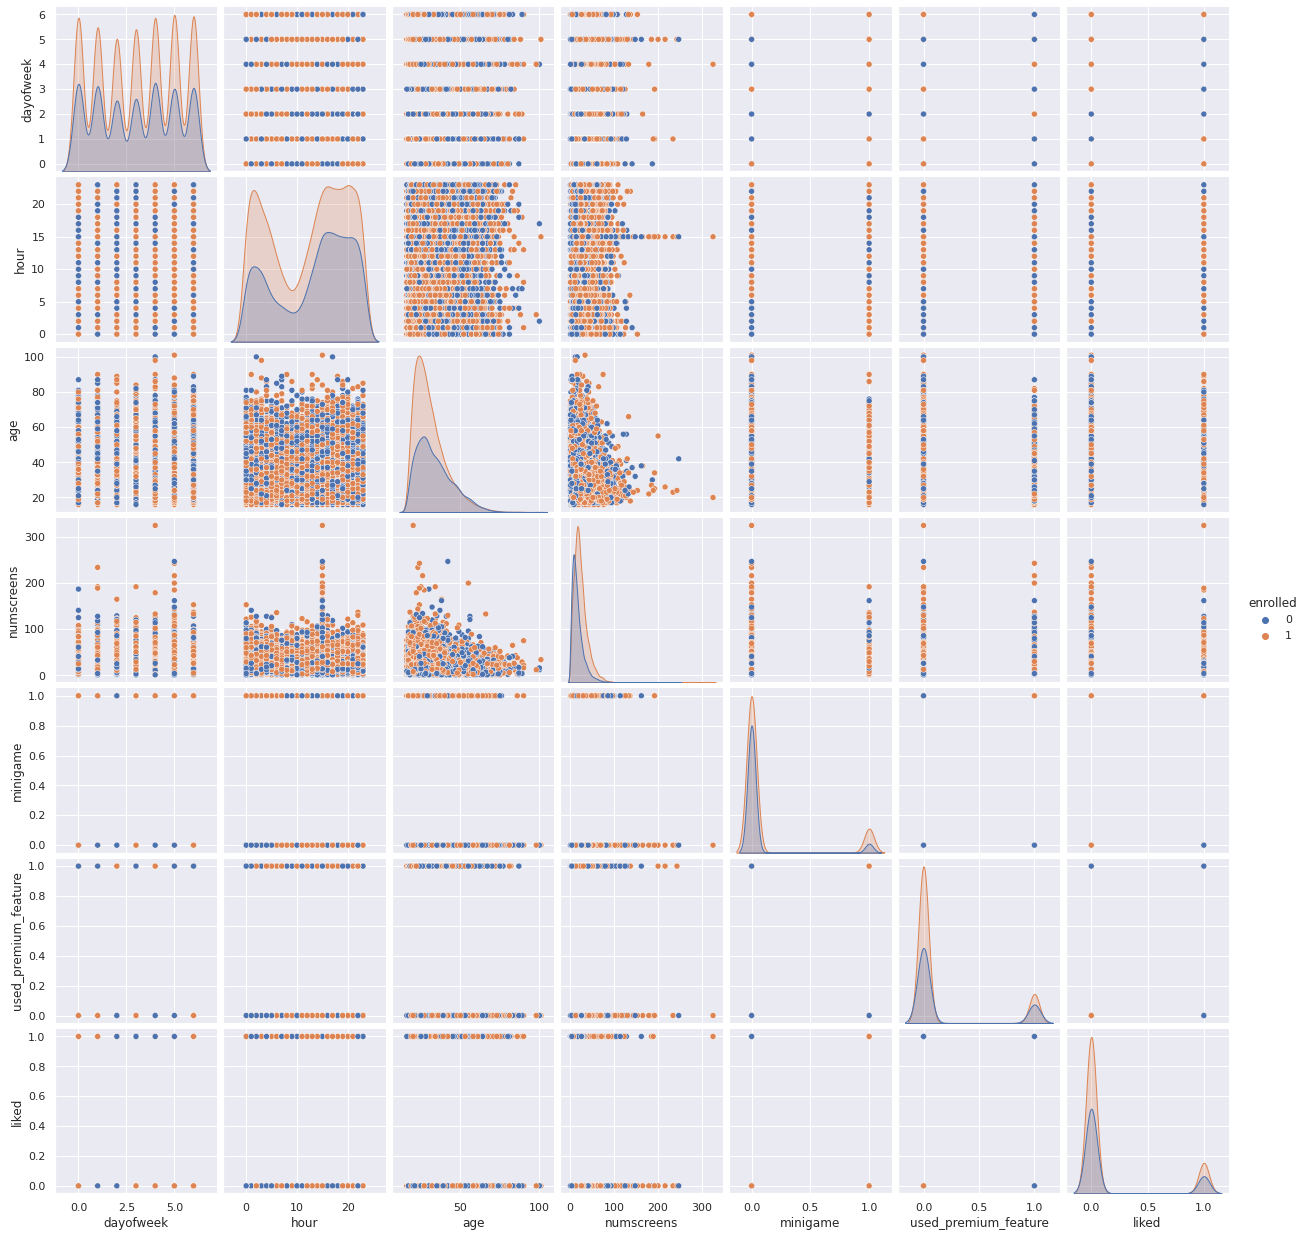

In [ ]:
# Pailplot
sns.pairplot(df2, hue  = 'enrolled')

# Count Bar plot of enrolled

In [ ]:
# Show counterplot of 'enrolled' feature
sns.countplot(df2.enrolled)

In [ ]:
print("Not enrolled user = ", (df2.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(df2.enrolled < 1).sum(),  "out of 50000")

# Correlation Barplot with enrolled features

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


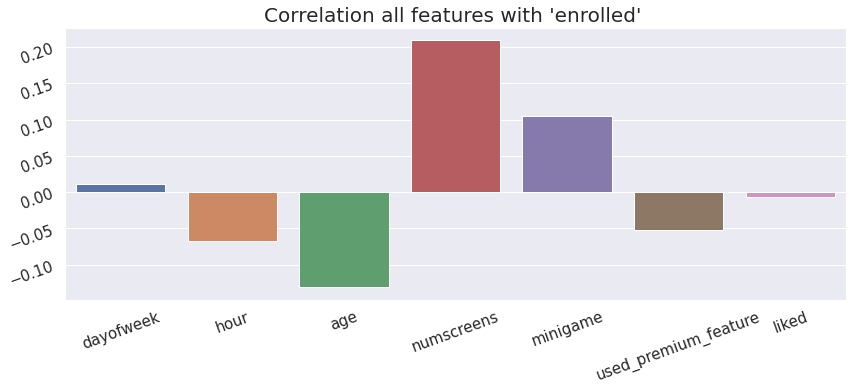

In [ ]:
sns.set() 
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)

df3 = df2.drop(['enrolled'], axis = 1)

src = df3.columns
trgt = df3.corrwith(df2.enrolled)

ax =sns.barplot(src, trgt) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k")

# Changing data types of column into datetime

In [ ]:
df['first_open'] =[parser.parse(i) for i in df['first_open']]
df['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in df['enrolled_date']]

In [ ]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [ ]:
df['enrolled_date'][49996]

NaT

In [ ]:
df['enrolled_date'][49995]

Timestamp('2013-05-09 13:47:52.875000')

# Now Calculate how much time customer take to enrolled

In [ ]:

df['time_to_enrolled']  = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [ ]:
tte = list(df['time_to_enrolled'][:100])
print(tte)

[nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, 920.0, 0.0, 40.0, nan, nan, 570.0, nan, 2066.0, 24.0, 196.0, 22.0, 1.0, 39.0, nan, 0.0, 0.0, 40.0, 0.0, 0.0, 767.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 2.0, nan, nan, 0.0, 0.0, nan, 67.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, 1504.0, nan, 41.0, 0.0, nan, 0.0, nan, nan, nan, 0.0, 14.0, 0.0, nan, nan, 0.0, 280.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 203.0, 65.0, 0.0, nan, 0.0, 1079.0, nan, 645.0, 0.0, 0.0, nan, 0.0, nan, nan, 1625.0]


(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

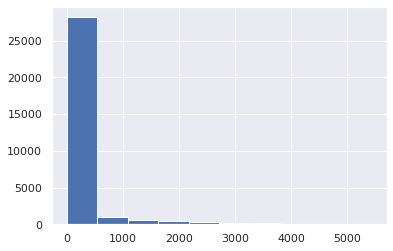

In [ ]:
# plot histogram
plt.hist(df['time_to_enrolled'].dropna())

# Feature Selection

In [ ]:
# Those customers have enrolled after 48 hours set as 0
df.loc[df.time_to_enrolled > 48, 'enrolled'] = 0

In [ ]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


# Drop some column that not correlated

In [ ]:
# may be delete
df.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [ ]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [ ]:
df.dtypes

user                     int64
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
liked                    int64
dtype: object

# Now Working on screen_list column

# Read another CSV file that contains the top screens name.


In [ ]:
# read csv file and convert it into numpy array
topscreen_file = '/content/drive/MyDrive/MAJU/ML/Project/P2 App Behavior to Subscription/top_screens.csv'
df_screen = pd.read_csv(topscreen_file).top_screens.values

In [ ]:
df_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [ ]:
len(df_screen)

58

In [ ]:
type(df_screen)

numpy.ndarray

In [ ]:
# Add ',' at the end of each string of  'sreen_list' so that we can count number of screen for each user.

df['screen_list'] = df.screen_list.astype(str) + ','

In [ ]:
df['screen_list'][0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login,'

In [ ]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [ ]:
# string into to number

for screen_name in df_screen:
    df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen_name + ",", "")

In [ ]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
49996,169179,1,0,35,"Home,",4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,324905,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get shape
df.shape

(50000, 68)

In [ ]:
# head of DataFrame
df.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# remain screen in 'screen_list'
df.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [ ]:
df.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [ ]:
# count remain screen list and store counted number in 'remain_screen_list'

df['remain_screen_list'] = df.screen_list.str.count(",")

In [ ]:
# Drop the 'screen_list'
df.drop(columns = ['screen_list'], inplace=True)

In [ ]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13


In [ ]:
# Total Columns
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [ ]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
df['saving_screens_count'] = df[saving_screens].sum(axis = 1)
df.drop(columns = saving_screens, inplace = True)

In [ ]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0


In [ ]:
df.shape

(50000, 59)

In [ ]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
df['credit_screens_count'] = df[credit_screens].sum(axis = 1)
df.drop(columns = credit_screens, axis = 1, inplace = True)

In [ ]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,EditProfile,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0


In [ ]:
df.shape

(50000, 55)

In [ ]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
df['cc_screens_count'] = df[cc_screens].sum(axis = 1)
df.drop(columns = cc_screens, inplace = True)

In [ ]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Loan3,Splash,Loan,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0


In [ ]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
df['loan_screens_count'] = df[loan_screens].sum(axis = 1)
df.drop(columns = loan_screens, inplace = True)

In [ ]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [ ]:
df.shape

(50000, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [ ]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.0

# Heat Map with correlation matrix with new data

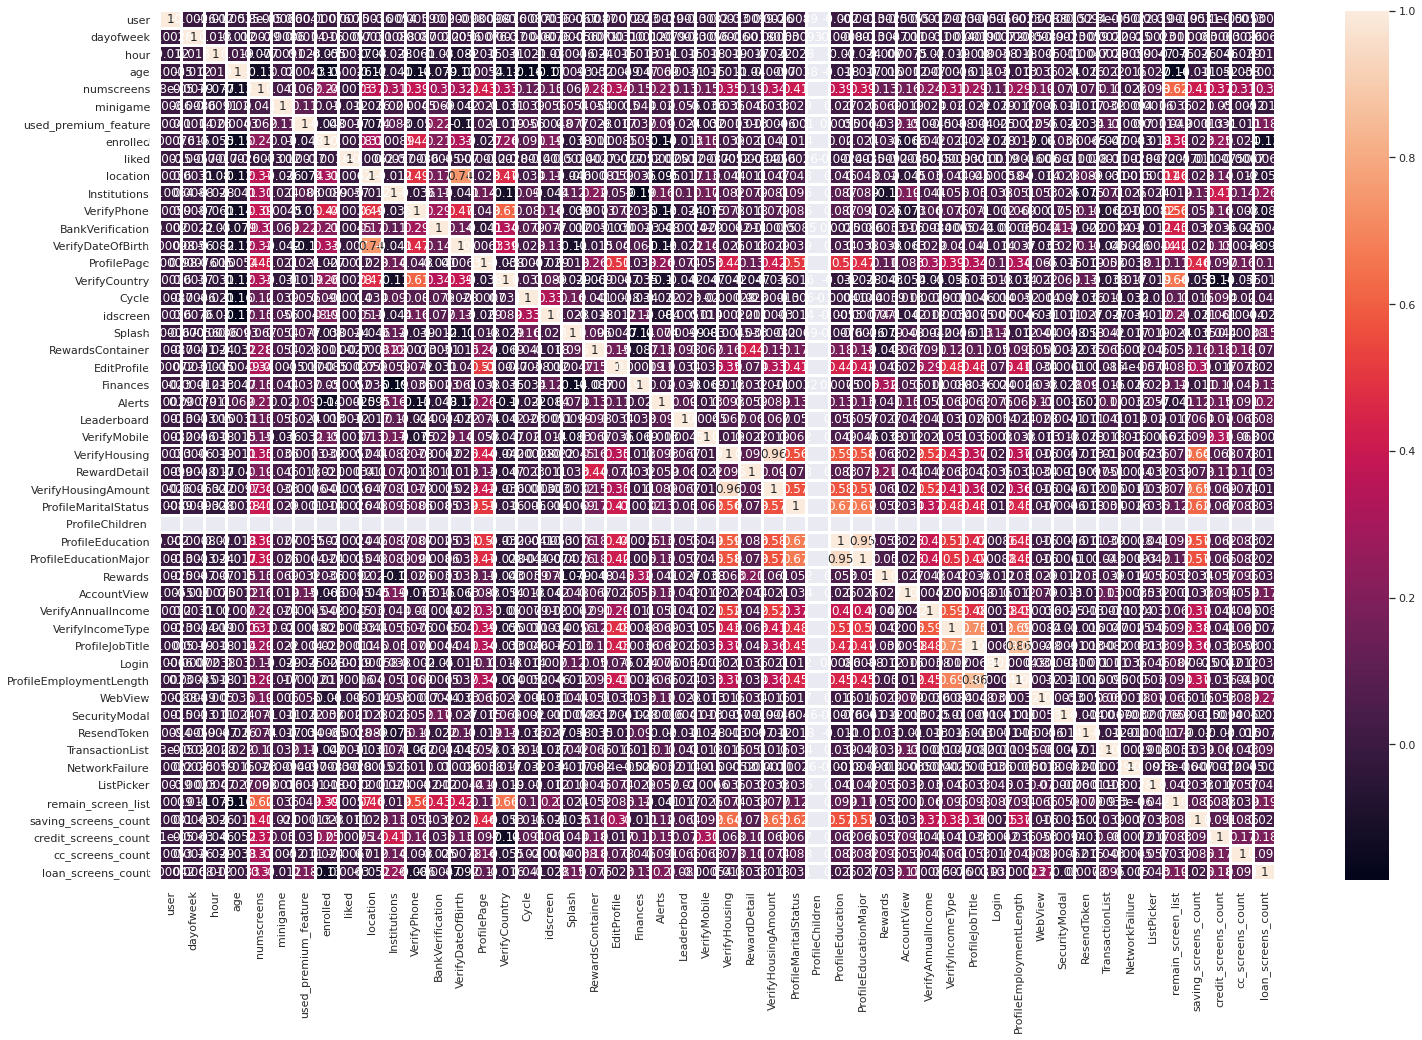

In [ ]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize = (25,16)) 
sns.heatmap(df.corr(), annot = True, linewidth =2)

In [ ]:
df.columns

In [ ]:
# df['ProfileChildren '].unique()

In [ ]:
# corr_matrix = df.corr()
# corr_matrix['ProfileChildren ']

In [ ]:
# df['ProfileChildren ']

# Splitting Data Set into Training and Testing

## Splitting Data Set

In [ ]:
clean_df = df
target = df['enrolled'] 
df.drop(columns = 'enrolled', inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 0)

In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [ ]:
# Dropping user column which is not needed but keep it just for the record
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)

test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

array([[-0.50496081,  1.00083719,  0.02552487, ..., -0.7633719 ,
        -0.28918541,  1.78538924],
       [-0.99738931,  1.13528016, -0.89803445, ...,  0.0575243 ,
        -0.28918541,  0.30979997],
       [-1.48981782, -1.15025039, -0.52861072, ...,  0.8784205 ,
         1.33659341,  1.78538924],
       ...,
       [-0.01253231, -0.88136444, -0.62096665, ..., -0.7633719 ,
        -0.28918541, -1.16578931],
       [ 0.4798962 ,  0.05973637, -0.43625479, ..., -0.7633719 ,
        -0.28918541, -1.16578931],
       [-0.99738931,  0.73195124, -1.08274631, ..., -0.7633719 ,
        -0.28918541,  0.30979997]])

In [ ]:
# sfsdfsdf

## Machine Learning Models

In [ ]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree

In [ ]:
# Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
# dt_model.fit(X_train, y_train)
# y_pred_dt = dt_model.predict(X_test)

# accuracy_score(y_test, y_pred_dt)

In [ ]:
# train with Standert Scaling dataset

from sklearn.tree import DecisionTreeClassifier

dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)

y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.6932

In [ ]:
def model_training(model):
  model.fit(X_train_sc, y_train)
  y_pred_sc = model.predict(X_test_sc)
  accuracy = accuracy_score(y_test, y_pred_sc)
  return accuracy

In [ ]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
accuracy = model_training(dt_model)
print("Decision Tree Model Accuracy: ", accuracy)

Decision Tree Model Accuracy:  0.6932


## KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
# knn_model.fit(X_train, y_train)
# y_pred_knn = knn_model.predict(X_test)

# accuracy_score(y_test, y_pred_knn)

In [ ]:
# train with Standert Scaling dataset
from sklearn.neighbors import KNeighborsClassifier

knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_train_sc, y_train)

y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.7314

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
accuracy = model_training(knn_model)
print("KNN Model Accuracy: ", accuracy)

## Naive Bayes

In [ ]:
# Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)
# y_pred_nb = nb_model.predict(X_test)

# accuracy_score(y_test, y_pred_nb)

In [ ]:
# train with Standert Scaling dataset
from sklearn.naive_bayes import GaussianNB

nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)

y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

In [ ]:
nb_model = GaussianNB()
accuracy = model_training(nb_model)
print("Naive Bayes Model Accuracy: ", accuracy)

## Random Forest

In [ ]:
# Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# accuracy_score(y_test, y_pred_rf)

In [ ]:
# train with Standert Scaling dataset
from sklearn.ensemble import RandomForestClassifier

rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)

y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_acc = model_training(rf_model)
print("Random Forest Model Accuracy: ", rf_acc)

## Logistic Regression

In [ ]:
# Logistic Regression
# from sklearn.linear_model import LogisticRegression
# lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_test)

# accuracy_score(y_test, y_pred_lr)

In [ ]:
# train with Standert Scaling dataset
from sklearn.linear_model import LogisticRegression

lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)

y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

In [ ]:
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_acc = model_training(lr_model)
print("Logistic Regression Model Accuracy: ", lr_acc)

## Support Vector Machine

In [ ]:
# Support Vector Machine
# from sklearn.svm import SVC
# svc_model = SVC()
# svc_model.fit(X_train, y_train)
# y_pred_svc = svc_model.predict(X_test)

# accuracy_score(y_test, y_pred_svc)

In [ ]:
# train with Standert Scaling dataset
from sklearn.svm import SVC

svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)

y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

In [ ]:
svm_model = SVC()
svm_acc = model_training(svm_model)
print("SVM Model Accuracy: ", svm_acc)

SVM Model Accuracy:  0.7789


In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 44.3min


# XGBoost Classifier


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

In [ ]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

In [ ]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

In [ ]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

# Results

# Confusion Matrix

In [ ]:
# confussion matrix

cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

# Classification Report

In [ ]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

# Cross Validation

In [ ]:
# Cross validation

from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)

print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())


# Final Result

In [ ]:
# final_result = pd.concat([test_userID, y_test], axis = 1)
# final_result['predicted result'] = y_pred_xgb_sc_pt2

# final_result